In [38]:
###
#Goal: See how varying SRM HR curvature will affect the sensitivity to the interferometer.
#First we use all of the aLIGO cavities to derive the ideal mode-matching parameters
#then we extract the beam q from the PRC, ITMX, and ITMY
#then we inject the previously extracted beam parameters with the "gauss" Command and slowly vary the SRM curvature
#to achieve an "almost" perfect mode-matching setup.
#we leave OMC untouched so that it will just have the SRC mismodematch propogated downstream.
###

In [39]:
%matplotlib inline
import pykat
import pylab as pl
import pandas
import matplotlib
import matplotlib.pyplot as plt
import csv
import math
import numpy as np
from pykat.parallel import parakat
from PropBeam import *

pandas.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [40]:
####Perfect Mode-Matching Version:
katfile = "aLIGO_IFO_AWC_tuning_DCoff_maxtem4.kat"
#katfile = "aligo_IFO_maxtem2.kat"

basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile)

# Add cavity parameter detectors
basekat.parseCommands("""
tf sus 1 0 p $mech_fres $mech_Q
const mech_fres 1  # Approx. resonance frequency
const mech_Q    1M # Guess for suspension Q factor


# Differentially modulate the strain in the arms
fsig darm  LXarm 1 0 1
fsig darm2 LYarm 1 180 1

bp OFI_outqx x q nOBAout
bp OFI_outqy y q nOBAout

#sq sqz 0 10 0 nsqz

cp cavOMC x q

cp cavOMC x z

qnoisedS NSR_with_RP    1 $fs nOMC_AROC_trans

xaxis darm f log 5 5k 50

yaxis lin re:im
""")

basekat.undumpNodes() #undump the vacuum nodes
kat=basekat.deepcopy() #copy kat code
kat.verbose = False
out = kat.run()

OFI_outqx = out["OFI_outqx"]
OFI_outqy = out["OFI_outqy"]

OMC_Waist_Location = out["cavOMC_x_z"][0].real #distance from first optic in cavity(OMC_HR surface) to the waist

Parsing `put lx1 L $Lmx` into pykat object not implemented yet, added as extra line.
Parsing `put ly1 L $Lmy` into pykat object not implemented yet, added as extra line.


In [41]:
kat1=basekat.deepcopy() #copy kat code
kat.verbose = False

ITMTL0 = kat1.ITMYTL.f.value
d_mismatch = []
OFI_outqx = []
OFI_outqy = []
darm = []

In [42]:
dp = 10 #Steps
diopters = 20e-6 #Estimated Avg fluctuations in TCS

for i in range(dp+1):
    mm = diopters*(float(i)/dp)
    print(float(i)/dp)
    f_new = (1/ITMTL0 + mm)**(-1)
    kat1.ITMYTL.f = f_new
    print(kat1.ITMYTL.f)
    outs = kat1.run()
    d_mismatch.append(  mm )
    OFI_outqx.append(outs["OFI_outqx"])
    OFI_outqy.append(outs["OFI_outqy"])
    darm.append(outs["NSR_with_RP"])
    
for i in range(dp+1):
    mm = diopters*(float(i)/dp)
    print(float(i)/dp)
    f_new = (1/ITMTL0 - mm)**(-1)
    kat1.ITMYTL.f = f_new
    print(f_new)
    outs = kat1.run()
    d_mismatch.append(  -mm )
    OFI_outqx.append(outs["OFI_outqx"])
    OFI_outqy.append(outs["OFI_outqy"])
    darm.append(outs["NSR_with_RP"])

0.0
34500.0
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:07:55.766685


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 15.6385 seconds
0.1
32273.152478952295
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:08:11.405502


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 14.5125 seconds
0.2
30316.344463971884
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:08:25.918316


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 13.2537 seconds
0.3
28583.264291632146
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:08:39.172329


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.8672 seconds
0.4
27037.617554858934
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:08:52.039918


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 13.4138 seconds
0.5
25650.557620817843
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:09:05.454036


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.5086 seconds
0.6
24398.868458274403
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:09:17.962941


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.7057 seconds
0.7
23263.65475387728
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:09:30.668935


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.4954 seconds
0.8
22229.38144329897
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:09:43.164717


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.5914 seconds
0.9
21283.158544108577
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:09:55.756574


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 14.0267 seconds
1.0
20414.201183431953
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:10:09.783579


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 14.3014 seconds
0.0
34500.0
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:10:24.085662


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.3971 seconds
0.1
37056.928034371645
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:10:36.483059


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.4659 seconds
0.2
40023.201856148495
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:10:48.949351


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.3787 seconds
0.3
43505.67465321564
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:11:01.328285


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.4661 seconds
0.4
47651.933701657465
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:11:13.794695


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 12.4776 seconds
0.5
52671.75572519085
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:11:26.272669


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 14.6211 seconds
0.6
58873.72013651878
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:11:40.894249


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 16.0785 seconds
0.7
66731.14119922632
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:11:56.973284


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 16.3584 seconds
0.8
77008.9285714286
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:12:13.332055


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 16.7576 seconds
0.9
91029.02374670186
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:12:30.090094


 99% | ETA:  0:00:00 | Calculating                                             


Finished in 16.7309 seconds
1.0
111290.3225806452
--------------------------------------------------------------
Running kat - Started at 2016-08-25 10:12:46.821435

Finished in 16.6545 seconds


 99% | ETA:  0:00:00 | Calculating                                             

In [43]:
lam = 1064e-9
pi = 3.1415926

w = []
for i in range(0,len(OFI_outqx),1):
    psi = 1/OFI_outqx[i][0]
    w_i = (-lam/(pi*psi.imag))**(.5)
    w.append(w_i)

micro_d  =[]
mm_waist =[]
for i in range(0,len(OFI_outqx),1):
    micro_d.append(d_mismatch[i]*1e6)
    mm_waist.append(w[i]*1000)

In [44]:
micro_d

[0.0,
 2.0000000000000004,
 4.000000000000001,
 6.0,
 8.000000000000002,
 10.0,
 12.0,
 14.0,
 16.000000000000004,
 18.0,
 20.0,
 -0.0,
 -2.0000000000000004,
 -4.000000000000001,
 -6.0,
 -8.000000000000002,
 -10.0,
 -12.0,
 -14.0,
 -16.000000000000004,
 -18.0,
 -20.0]

/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


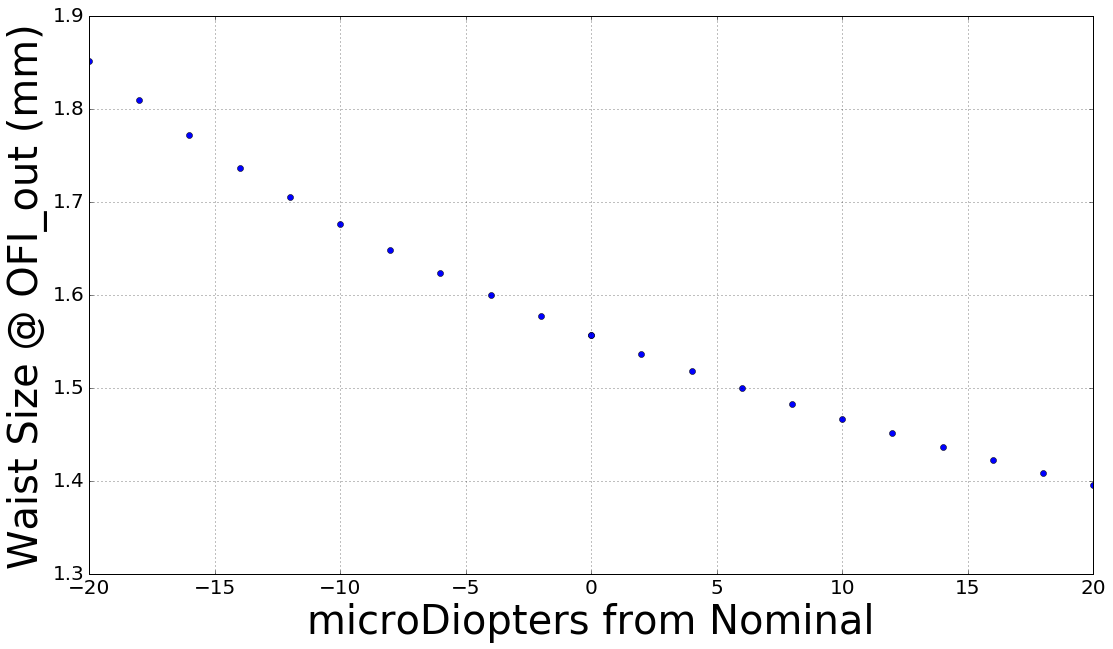

In [45]:
pl.figure(figsize=(18, 10), dpi=80)
pl.subplot(111)
pl.plot(micro_d, mm_waist, 'o')

pl.grid(True, zorder=-1)
pl.legend()

pl.xlabel("microDiopters from Nominal",  fontsize=40)
pl.ylabel("Waist Size @ OFI_out (mm)", fontsize=40)
pl.tick_params(labelsize=20)

#pl.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#pl.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


pl.show()

/home/thomasvo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


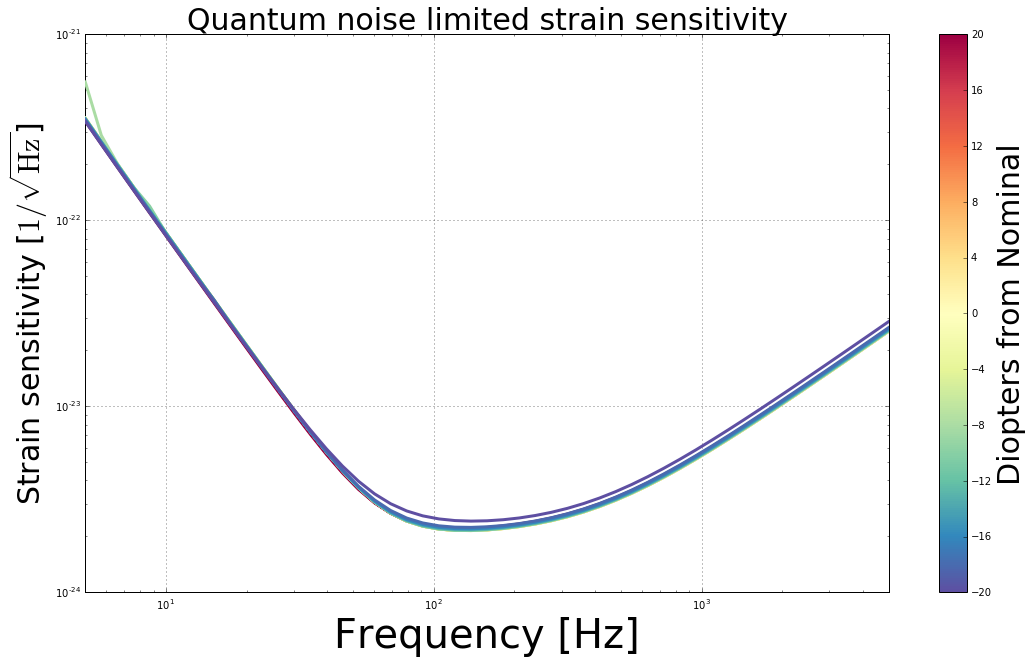

In [59]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(darm)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.loglog(outs.x, np.real(darm[i]),linewidth=3,zorder=1000, color = c,)
    
pl.subplot(111)

pl.title("Quantum noise limited strain sensitivity",fontsize=30)
pl.xlim(outs.x.min(),outs.x.max())
#pl.ylim(1e-24,1e-23)

pl.grid(True, zorder=-1)
pl.legend()

pl.xlabel("Frequency [Hz]",fontsize=40)
pl.ylabel("Strain sensitivity [$1/\\sqrt{\mathrm{Hz}}$]",fontsize=30)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal")
#pylab.savefig("fc_mismatch_to_sqz_ifo_maxtem_%i_sqzing_%g.pdf" % (maxtem, kat.sqz.db))
cb.set_label("Diopters from Nominal",fontsize=30)

pl.savefig("h_t_sensitivity_varyingITMThermallens.eps")

pl.show()

In [60]:
f = open('q_OFI_out.txt', 'w')
wr = csv.writer(f)
for i in range(0,len(micro_d),1):
        wr.writerow( [ micro_d[i], OFI_outqx[i][0] ])
f.close()

In [61]:


d1 = 2.724 # distance from OFI output to OM1
d2 = 1.395 # distance from OM1 to OM2
d3 = 0.631 # distance from OM2 to OM3
d4 = 0.196 # distance from OM3 to Input Coupler
d5 = 0.565   # distance from IC to end of OMC cavity. OMC round trip is 1.13


f1 = -4.6/2
f2 = 1.7058/2
f3 = math.inf
f4 = math.inf


w_full = []
d_full = []

for i in range(0,len(micro_d),1):
    q_in = OFI_outqx[i][0]
    tele = PropBeam(q_in,d1,d2,d3,d4,d5,f1,f2,f3,f4)
    out_modal = tele.FullModal()
    w_full.append( out_modal['w_modal'] )
    d_full.append( out_modal['d_modal'] )



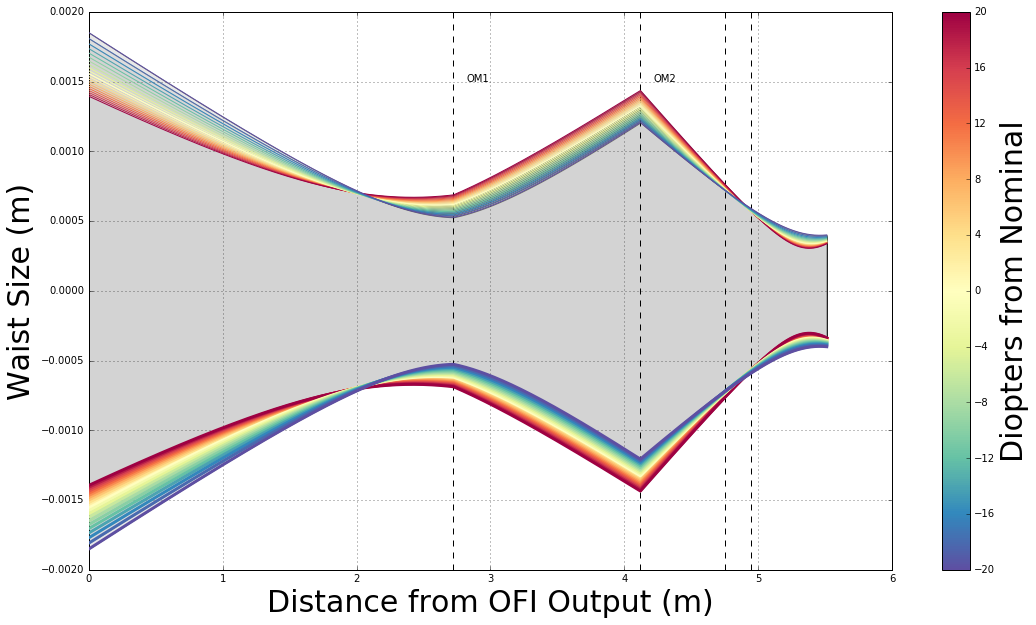

In [62]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(micro_d)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.plot(d_full[0], w_full[i],linewidth=1,zorder=1000, color = c)
    neg = [ -x for x in w_full[i]]
    pl.plot(d_full[0], neg,linewidth=3,zorder=1000, color = c)
    pl.fill_between(d_full[0], w_full[i], neg, facecolor='lightgrey', alpha=0.5)
pl.subplot(111)


pl.axvline(x=d1,color='k',ls='dashed')
pl.axvline(x=d1+d2,color='k',ls='dashed')
pl.axvline(x=d1+d2+d3,color='k',ls='dashed')
pl.axvline(x=d1+d2+d3+d4,color='k',ls='dashed')

pl.annotate('OM1' ,xy=(d1+.1, .0015))
pl.annotate('OM2' ,xy=(d1+d2+.1, .0015))

#pl.title("Quantum noise limited strain sensitivity")
#pl.xlim(0,9)
#pl.ylim(-1,1)

pl.grid(True, zorder=-1)
#pl.legend()

pl.xlabel("Distance from OFI Output (m)",fontsize=30)
pl.ylabel("Waist Size (m)",fontsize=30)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal",fontsize=30)
pl.savefig("Beam_mode_varyingITMthermallens.eps")


In [63]:
#Extract the waist size and location
omc_waist_location = []
omc_waist_size = []

for i in range(0, len(micro_d),1):
    omc_waist_size.append(min(w_full[i]))
    index = w_full[i].index(min(w_full[i]))
    omc_waist_location.append(d_full[0][index])
    

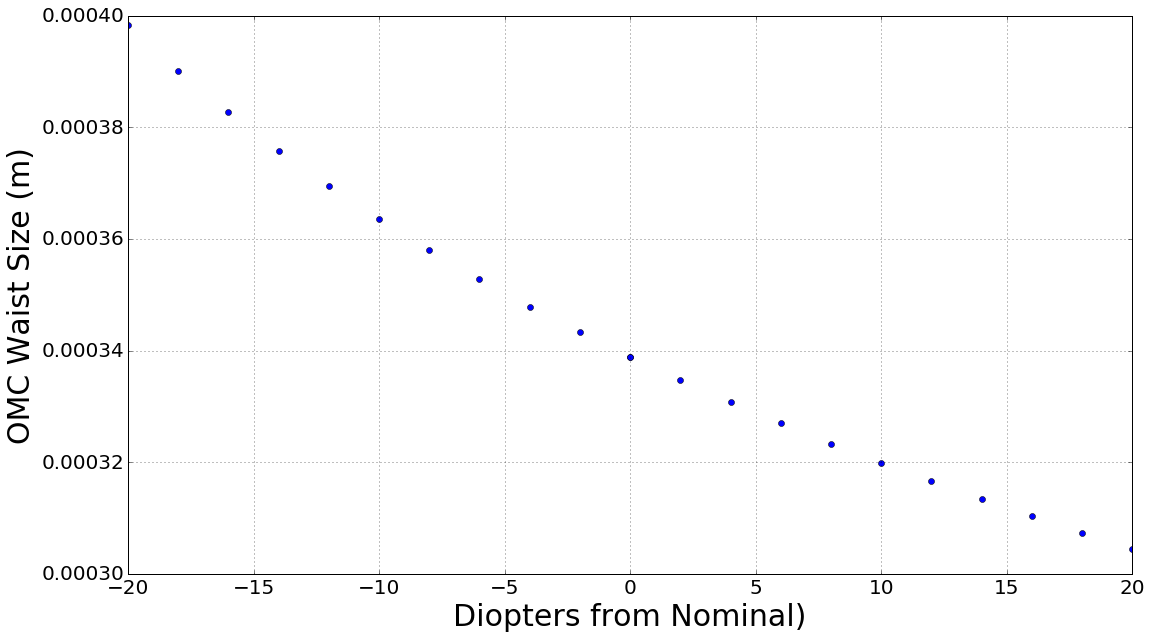

In [64]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)
pl.plot(micro_d, omc_waist_size, 'o')

pl.grid(True, zorder=-1)
pl.tick_params(labelsize=20)
pl.xlabel("Diopters from Nominal)",fontsize=30)
pl.ylabel("OMC Waist Size (m)",fontsize=30)
pl.savefig("Beam_size_varyingITMthermallens.eps")

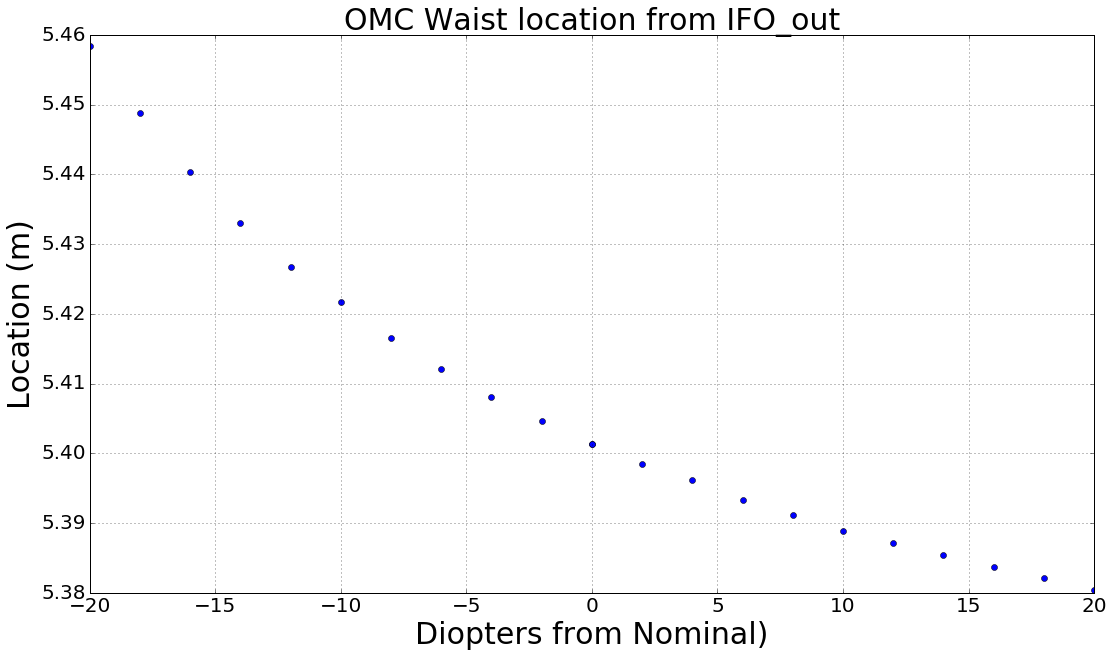

In [65]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)
pl.plot(micro_d, omc_waist_location, 'o')

pl.grid(True, zorder=-1)
pl.tick_params(labelsize=20)
pl.title("OMC Waist location from IFO_out",fontsize=30)
pl.xlabel("Diopters from Nominal)",fontsize=30)
pl.ylabel("Location (m)",fontsize=30)
pl.savefig("Beam_location_varyingITMthermallens.eps")

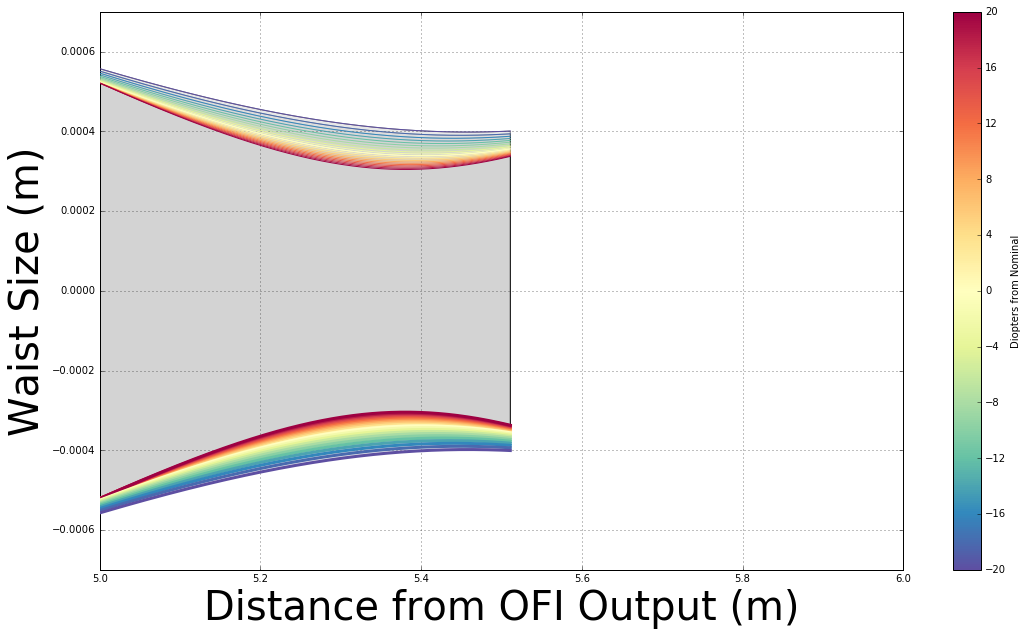

In [66]:
matplotlib.RcParams.update({'font.size', 'Large'})

pl.figure(figsize=(18, 10), dpi=80)

cm = pl.cm.Spectral_r
norm = matplotlib.colors.Normalize(-20,20)

s_m = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
s_m.set_array([])


for i in range(len(micro_d)):
    c = c = s_m.to_rgba(micro_d[i])
    pl.subplot(111)
    pl.plot(d_full[0], w_full[i],linewidth=1,zorder=1000, color = c)
    neg = [ -x for x in w_full[i]]
    pl.plot(d_full[0], neg,linewidth=3,zorder=1000, color = c)
    pl.fill_between(d_full[0], w_full[i], neg, facecolor='lightgrey', alpha=0.5)
pl.subplot(111)

#pl.title("Quantum noise limited strain sensitivity")
pl.xlim(5.0,6.0)
pl.ylim(-.0007,.0007)

pl.grid(True, zorder=-1)
#pl.legend()

pl.xlabel("Distance from OFI Output (m)",fontsize=40)
pl.ylabel("Waist Size (m)",fontsize=40)

cb = pl.colorbar(s_m)
cb.set_label("Diopters from Nominal")


In [67]:
f = open('waist_location.txt', 'w')
wr = csv.writer(f)
for i in range(0,len(micro_d),1):
        wr.writerow([micro_d[i],omc_waist_location[i]])
f.close()


In [68]:
darm[21]

array([  3.41122101e-22+0.j,   2.56328080e-22+0.j,   1.93101413e-22+0.j,
         1.45756671e-22+0.j,   1.10192666e-22+0.j,   8.34155591e-23+0.j,
         6.32200883e-23+0.j,   4.79719511e-23+0.j,   3.64895088e-23+0.j,
         2.77804195e-23+0.j,   2.11520119e-23+0.j,   1.61726767e-23+0.j,
         1.24200934e-23+0.j,   9.59989564e-24+0.j,   7.49159557e-24+0.j,
         5.92902079e-24+0.j,   4.78605840e-24+0.j,   3.96556662e-24+0.j,
         3.39091495e-24+0.j,   3.00027111e-24+0.j,   2.74365604e-24+0.j,
         2.58190536e-24+0.j,   2.48605153e-24+0.j,   2.43614136e-24+0.j,
         2.41948902e-24+0.j,   2.42884630e-24+0.j,   2.46087200e-24+0.j,
         2.51502145e-24+0.j,   2.59280891e-24+0.j,   2.69734863e-24+0.j,
         2.83305669e-24+0.j,   3.00483680e-24+0.j,   3.21913474e-24+0.j,
         3.48313762e-24+0.j,   3.80444549e-24+0.j,   4.19148252e-24+0.j,
         4.65385942e-24+0.j,   5.20082079e-24+0.j,   5.84480044e-24+0.j,
         6.59877899e-24+0.j,   7.47774234e-24+0.j, 

In [69]:
l = open('waist_size.txt', 'w')
wr = csv.writer(l)
for i in range(0,len(micro_d),1):
        wr.writerow([micro_d[i],omc_waist_size[i]])
l.close()
